In [583]:
import statsmodels.formula.api as sm
import pandas as pd
import linearmodels as lm
import matplotlib.pyplot as plt; plt.rcParams["figure.figsize"] = (20,10)
import numpy as np

### Question 4

#### a

In [682]:
# Loading and Preprocessing the Data 
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')
gm[['logGDPpercap_within','lifeExp_within']] = (gm.groupby('continent')[['logGDPpercap','lifeexp']].transform(lambda x: x - x.mean()))

# Analyzing the Within Variation 
summary = sm.ols(formula = 'lifeExp_within ~ logGDPpercap_within', data = gm).fit().summary()
export_results_to_csv(summary, 'q4a')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeExp_within   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1228.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          5.06e-203
Time:                        18:22:48   Log-Likelihood:                -5740.0
No. Observations:                1704   AIC:                         1.148e+04
Df Residuals:                    1702   BIC:                         1.149e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.137e-06      0.170  -6.68e-06      1.000      -0.334       0.334
logGDPpercap_within     6.4220      0.183     35.044      0.000       6.063       6.781
==============================================================================
Omnibus:                       80.310   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.401
Skew:                          -0.488   Prob(JB):                     4.29e-22
Kurtosis:                       3.659   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [679]:
def export_results_to_csv(summary, filename, directory = './Assignment_4_Files/'):
    for i in np.arange(len(summary.tables)):
        df = pd.DataFrame(summary.tables[i])
        if i == 0:
            type = 'results'
        if i == 1:
            type = 'coefficients'
        if i == 2:
            type = 'info'
        df.to_csv(directory + filename + '_' + type +'.csv')

#### b

In [683]:
# Loading and Preprocessing Data 
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

# Running Regression with Continent and Year Fixed Effects
summary = sm.ols(formula = 'lifeexp ~ logGDPpercap + continent + year', data = gm).fit().summary()
export_results_to_csv(summary, 'q4b')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1119.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:23:09   Log-Likelihood:                -5413.6
No. Observations:                1704   AIC:                         1.084e+04
Df Residuals:                    1697   BIC:                         1.088e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -465.8696     16.674    -27.939      0.000    -498.574    -433.165
continent[T.Americas]     8.9259      0.463     19.280      0.000       8.018       9.834
continent[T.Asia]         7.0629      0.396     17.840      0.000       6.286       7.839
continent[T.Europe]      12.5078      0.510     24.541      0.000      11.508      13.507
continent[T.Oceania]     12.7507      1.275     10.002      0.000      10.250      15.251
logGDPpercap              5.0238      0.159     31.503      0.000       4.711       5.337
year                      0.2416      0.009     28.142      0.000       0.225       0.258
==============================================================================
Omnibus:                       66.798   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.847
Skew:                          -0.433   Prob(JB):                     2.78e-18
Kurtosis:                       3.623   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### c

##### We were grouping by continent only, and ignoring the year fixed effects

In [684]:
# Loading and Preprocessing the Data 
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

# below, tweaking the groupby function to include continent and year, so our within effect is now within a continent AND year.
gm[['logGDPpercap_within', 'lifeExp_within']] = gm.groupby(['continent', 'year'])[['logGDPpercap', 'lifeexp']].transform(lambda row: row - row.mean())

# Analyzing the Within Variation 
summary = sm.ols(formula = 'lifeExp_within ~ logGDPpercap_within', data = gm).fit().summary()
export_results_to_csv(summary, 'q4c')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeExp_within   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1069.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):          2.26e-182
Time:                        18:23:48   Log-Likelihood:                -5336.7
No. Observations:                1704   AIC:                         1.068e+04
Df Residuals:                    1702   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.333e-07      0.134   -6.2e-06      1.000      -0.264       0.264
logGDPpercap_within     5.0529      0.155     32.696      0.000       4.750       5.356
==============================================================================
Omnibus:                       60.180   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.402
Skew:                          -0.289   Prob(JB):                     5.80e-23
Kurtosis:                       4.052   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Verifying this by running the regression from part b without controlling for year

In [685]:
# Loading and Preprocessing Data 
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

# Running Regression with Continent and Year Fixed Effects 
summary = sm.ols(formula = 'lifeexp ~ logGDPpercap + continent ', data = gm).fit().summary()
#export_results_to_csv(summary, 'q4b')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     807.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:24:34   Log-Likelihood:                -5740.0
No. Observations:                1704   AIC:                         1.149e+04
Df Residuals:                    1698   BIC:                         1.152e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.3170      1.359      1.704      0.088      -0.349       4.983
continent[T.Americas]     7.0147      0.554     12.652      0.000       5.927       8.102
continent[T.Asia]         5.9117      0.477     12.400      0.000       4.977       6.847
continent[T.Europe]       9.5771      0.604     15.855      0.000       8.392      10.762
continent[T.Oceania]      9.2135      1.536      5.999      0.000       6.201      12.226
logGDPpercap              6.4220      0.183     35.003      0.000       6.062       6.782
==============================================================================
Omnibus:                       80.310   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.400
Skew:                          -0.488   Prob(JB):                     4.29e-22
Kurtosis:                       3.659   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### ~voila~

### Question 8

#### a

In [686]:
# setting up dataframe
od = pd.read_stata('./data/organ_donations.dta')

# recoding the quarters for easier indexing
def recode_quarters(string):
    match string:
        case 'Q42010':
            return 1
        case 'Q12011':
            return 2
        case 'Q22011':
            return 3
        case 'Q32011':
            return 4
        case 'Q42011':
            return 5
        case 'Q12012':
            return 6
od.quarter = od.quarter.apply(lambda row: recode_quarters(row))

# creating the treated variable
od['treated'] = 1*((od.state == 'California') & (od.quarter > 3))

# specifiying and running the regression
summary = sm.ols(formula = 'rate ~ treated + state + quarter_num', data = od).fit(method='qr', cov_kwds='cluster').summary()
export_results_to_csv(summary, 'q8a')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           9.77e-94
Time:                        18:25:41   Log-Likelihood:                 388.57
No. Observations:                 162   AIC:                            -711.1
Df Residuals:                     129   BIC:                            -609.2
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7655      0.011     69.880      0.000       0.744       0.787
state[T.Arizona]                 -0.5329      0.014    -37.466      0.000      -0.561      -0.505
state[T.California]              -0.4950      0.018    -28.239      0.000      -0.530      -0.460
state[T.Colorado]                -0.1055      0.014     -7.417      0.000      -0.134      -0.077
state[T.Connecticut]             -0.3802      0.014    -26.731      0.000      -0.408      -0.352
state[T.District of Columbia]    -0.4300      0.014    -30.237      0.000      -0.458      -0.402
state[T.Florida]                 -0.3769      0.014    -26.504      0.000      -0.405      -0.349
state[T.Hawaii]                  -0.3524      0.014    -24.779      0.000      -0.381      -0.324
state[T.Louisiana]               -0.2167      0.014    -15.239      0.000      -0.245      -0.189
state[T.Maryland]                -0.3076      0.014    -21.629      0.000      -0.336      -0.279
state[T.Michigan]                -0.5409      0.014    -38.029      0.000      -0.569      -0.513
state[T.Minnesota]               -0.2457      0.014    -17.277      0.000      -0.274      -0.218
state[T.Missouri]                -0.3660      0.014    -25.733      0.000      -0.394      -0.338
state[T.Montana]                 -0.1184      0.014     -8.328      0.000      -0.147      -0.090
state[T.Nebraska]                -0.3308      0.014    -23.260      0.000      -0.359      -0.303
state[T.New Hampshire]           -0.2292      0.014    -16.115      0.000      -0.257      -0.201
state[T.New Jersey]              -0.4607      0.014    -32.396      0.000      -0.489      -0.433
state[T.New York]                -0.6435      0.014    -45.249      0.000      -0.672      -0.615
state[T.North Carolina]          -0.2483      0.014    -17.462      0.000      -0.276      -0.220
state[T.Ohio]                    -0.2077      0.014    -14.606      0.000      -0.236      -0.180
state[T.Pennsylvania]            -0.3190      0.014    -22.433      0.000      -0.347      -0.291
state[T.South Carolina]          -0.5043      0.014    -35.457      0.000      -0.532      -0.476
state[T.Tennessee]               -0.4381      0.014    -30.806      0.000      -0.466      -0.410
state[T.Virginia]                -0.4324      0.014    -30.401      0.000      -0.461      -0.404
state[T.Washington]              -0.1863      0.014    -13.100      0.000      -0.214      -0.158
state[T.Wisconsin]               -0.2012      0.014    -14.148      0.000      -0.229      -0.173
state[T.Wyoming]                 -0.1823      0.014    -12.820      0.000      -0.210      -0.154
quarter_num[T.Quarter 1 2011]    -0.0024      0.007     -0.357      0.721      -0.016       0.011
quarter_num[T.Quarter 2 2011]     0.0049     

#### b.

In [687]:
# recoding the treatment variable to be Pacific-adjacent states
def pacific(state):
    match state:
        case 'California':
            return True
        case 'Oregon':
            return True
        case 'Washington':
            return True
        case 'Hawaii':
            return True
        case 'Alaska':
            return True
        case _:
            return False
        
od['pacific'] = od.state.apply(lambda state: pacific(state))
od['treated'] = 1*(od.pacific & (od.quarter > 3))

# specifiying and running the regression
summary = sm.ols(formula = 'rate ~ treated + state + quarter_num', data = od).fit(method='qr', cov_kwds='cluster').summary()
export_results_to_csv(summary, 'q8b')
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.17e-93
Time:                        18:26:04   Log-Likelihood:                 388.34
No. Observations:                 162   AIC:                            -710.7
Df Residuals:                     129   BIC:                            -608.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7702      0.012     64.675      0.000       0.747       0.794
state[T.Arizona]                 -0.5378      0.015    -35.263      0.000      -0.568      -0.508
state[T.California]              -0.5063      0.014    -35.545      0.000      -0.534      -0.478
state[T.Colorado]                -0.1104      0.015     -7.242      0.000      -0.141      -0.080
state[T.Connecticut]             -0.3851      0.015    -25.252      0.000      -0.415      -0.355
state[T.District of Columbia]    -0.4350      0.015    -28.522      0.000      -0.465      -0.405
state[T.Florida]                 -0.3819      0.015    -25.040      0.000      -0.412      -0.352
state[T.Hawaii]                  -0.3524      0.014    -24.743      0.000      -0.381      -0.324
state[T.Louisiana]               -0.2217      0.015    -14.536      0.000      -0.252      -0.192
state[T.Maryland]                -0.3126      0.015    -20.494      0.000      -0.343      -0.282
state[T.Michigan]                -0.5458      0.015    -35.787      0.000      -0.576      -0.516
state[T.Minnesota]               -0.2507      0.015    -16.436      0.000      -0.281      -0.221
state[T.Missouri]                -0.3709      0.015    -24.321      0.000      -0.401      -0.341
state[T.Montana]                 -0.1234      0.015     -8.092      0.000      -0.154      -0.093
state[T.Nebraska]                -0.3358      0.015    -22.015      0.000      -0.366      -0.306
state[T.New Hampshire]           -0.2342      0.015    -15.353      0.000      -0.264      -0.204
state[T.New Jersey]              -0.4657      0.015    -30.534      0.000      -0.496      -0.436
state[T.New York]                -0.6485      0.015    -42.520      0.000      -0.679      -0.618
state[T.North Carolina]          -0.2533      0.015    -16.609      0.000      -0.283      -0.223
state[T.Ohio]                    -0.2127      0.015    -13.946      0.000      -0.243      -0.183
state[T.Pennsylvania]            -0.3240      0.015    -21.244      0.000      -0.354      -0.294
state[T.South Carolina]          -0.5092      0.015    -33.389      0.000      -0.539      -0.479
state[T.Tennessee]               -0.4431      0.015    -29.052      0.000      -0.473      -0.413
state[T.Virginia]                -0.4373      0.015    -28.675      0.000      -0.468      -0.407
state[T.Washington]              -0.1863      0.014    -13.081      0.000      -0.214      -0.158
state[T.Wisconsin]               -0.2062      0.015    -13.518      0.000      -0.236      -0.176
state[T.Wyoming]                 -0.1873      0.015    -12.280      0.000      -0.217      -0.157
quarter_num[T.Quarter 1 2011]    -0.0024      0.007     -0.357      0.722      -0.016       0.011
quarter_num[T.Quarter 2 2011]     0.0049     

#### c.

In [603]:
# manually creating the interactions
for quarter in od.quarter.unique():
    name = 'Q'+str(quarter)
    od[name] = 1*(od.pacific)
    od.loc[od.quarter != quarter, name] = 0

# specifying the regression - saving to variable to later create a table
ols = sm.ols(formula = 'rate ~ Q1 + Q3 + Q4 + Q5 + Q6 + state + quarter_num', data = od).fit(method='qr', cov_kwds='cluster')
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.19e-89
Time:                        17:51:47   Log-Likelihood:                 388.61
No. Observations:                 162   AIC:                            -703.2
Df Residuals:                     125   BIC:                            -589.0
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7760      0.017     45.636      0.000       0.742       0.810
state[T.Arizona]                 -0.5427      0.019    -28.537      0.000      -0.580      -0.505
state[T.California]              -0.5063      0.014    -35.049      0.000      -0.535      -0.478
state[T.Colorado]                -0.1154      0.019     -6.065      0.000      -0.153      -0.078
state[T.Connecticut]             -0.3901      0.019    -20.509      0.000      -0.428      -0.352
state[T.District of Columbia]    -0.4399      0.019    -23.131      0.000      -0.478      -0.402
state[T.Florida]                 -0.3868      0.019    -20.339      0.000      -0.424      -0.349
state[T.Hawaii]                  -0.3524      0.014    -24.398      0.000      -0.381      -0.324
state[T.Louisiana]               -0.2266      0.019    -11.915      0.000      -0.264      -0.189
state[T.Maryland]                -0.3175      0.019    -16.693      0.000      -0.355      -0.280
state[T.Michigan]                -0.5507      0.019    -28.957      0.000      -0.588      -0.513
state[T.Minnesota]               -0.2556      0.019    -13.439      0.000      -0.293      -0.218
state[T.Missouri]                -0.3759      0.019    -19.762      0.000      -0.413      -0.338
state[T.Montana]                 -0.1283      0.019     -6.747      0.000      -0.166      -0.091
state[T.Nebraska]                -0.3407      0.019    -17.913      0.000      -0.378      -0.303
state[T.New Hampshire]           -0.2391      0.019    -12.570      0.000      -0.277      -0.201
state[T.New Jersey]              -0.4706      0.019    -24.745      0.000      -0.508      -0.433
state[T.New York]                -0.6534      0.019    -34.356      0.000      -0.691      -0.616
state[T.North Carolina]          -0.2582      0.019    -13.577      0.000      -0.296      -0.221
state[T.Ohio]                    -0.2176      0.019    -11.441      0.000      -0.255      -0.180
state[T.Pennsylvania]            -0.3289      0.019    -17.294      0.000      -0.367      -0.291
state[T.South Carolina]          -0.5142      0.019    -27.034      0.000      -0.552      -0.477
state[T.Tennessee]               -0.4480      0.019    -23.556      0.000      -0.486      -0.410
state[T.Virginia]                -0.4423      0.019    -23.253      0.000      -0.480      -0.405
state[T.Washington]              -0.1863      0.014    -12.899      0.000      -0.215      -0.158
state[T.Wisconsin]               -0.2111      0.019    -11.099      0.000      -0.249      -0.173
state[T.Wyoming]                 -0.1922      0.019    -10.106      0.000      -0.230      -0.155
quarter_num[T.Quarter 1 2011]    -0.0040      0.007     -0.547      0.585      -0.019       0.011
quarter_num[T.Quarter 2 2011]     0.0038     

In [618]:
ols.bse['Q1']

0.019167409033226755

In [621]:
# our index
quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
    
# creates 99% CI from model
conf = ols.conf_int(0.01)
conf.loc['Q2'] = 0
conf = conf.loc[quarters]

# pulls coefficients of interest from model
coeff = ols.params[['Q1', 'Q3', 'Q4', 'Q5', 'Q6']] 
coeff.loc['Q2'] = 0
coeff = coeff[quarters]

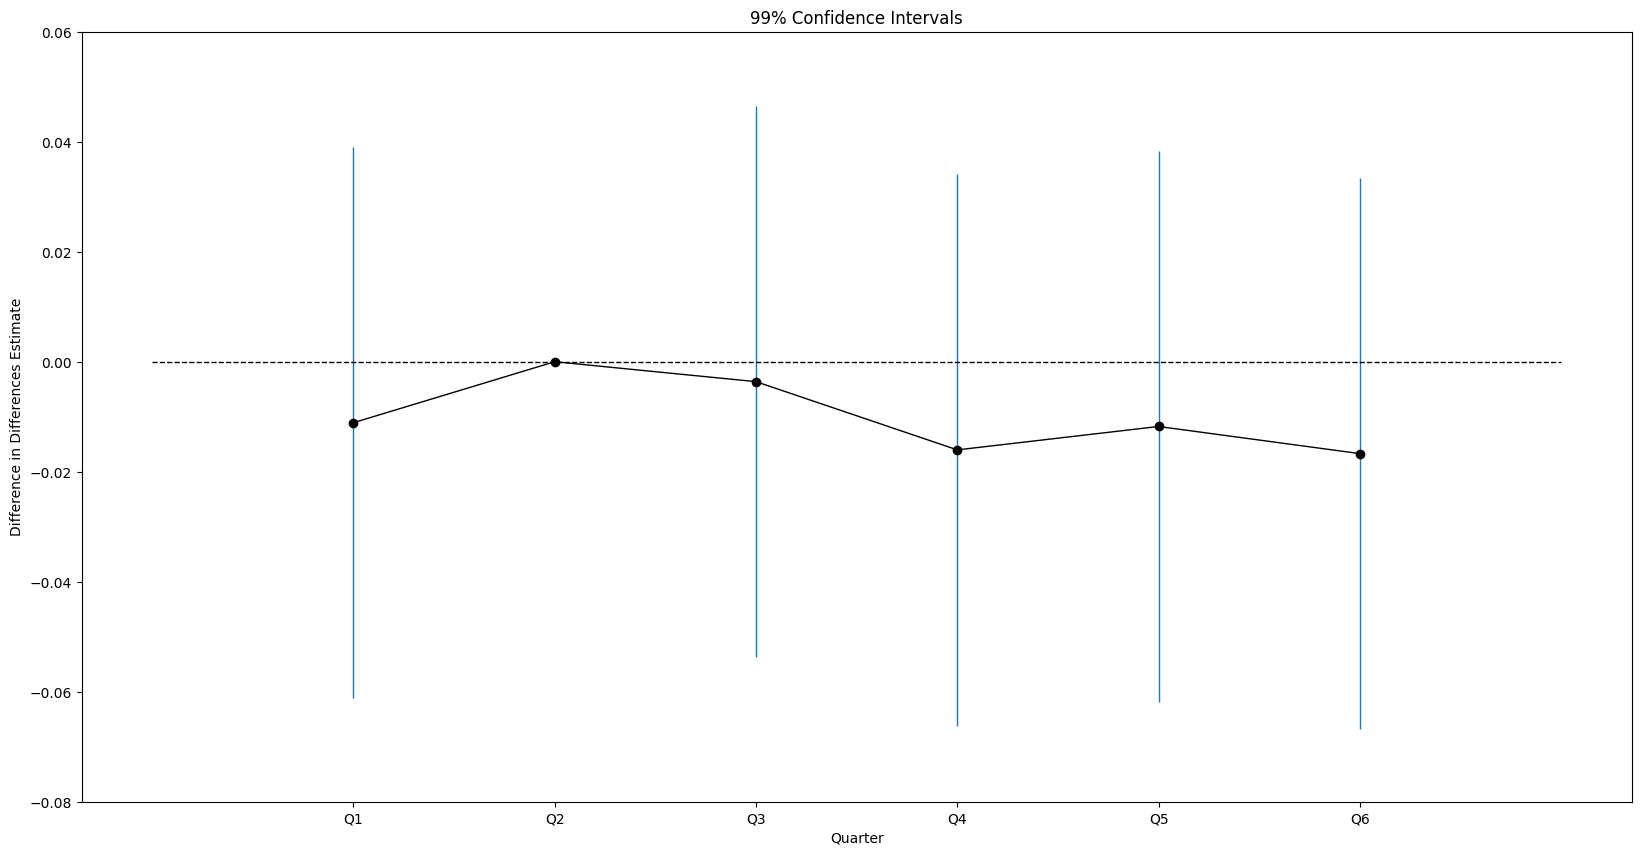

In [688]:
# plotting and formatting the confidence intervals
fig, axes = plt.subplots(1,1);

for i in conf.index:
    axes.vlines(x = i, ymin=conf.loc[i][0], ymax=conf.loc[i][1], lw = 1)

axes.plot(coeff, 'o-', lw=1, color = 'black');
axes.hlines(y=0, xmin=-1, xmax = len(conf.index), color = 'black', lw=1, linestyle = 'dashed')
axes.set_ylim(bottom = -0.08, top = 0.06);
axes.set_ylabel('Difference in Differences Estimate');
axes.set_xlabel('Quarter');
axes.set_title('99% Confidence Intervals');
#axes.set_xticks([i for i in range(len(conf))], labels = conf.index);
plt.savefig('./Assignment_4_Files/q8c.png')